In [1]:
import numpy as np
import pandas as pd


In [3]:
data=pd.read_csv("./Documents/machine-learning-aug-18/class_09/titanic.csv")

In [4]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#Dropped the unnecessary columns.
columns_to_drop=["PassengerId","Name","Embarked","Ticket","Cabin"]

In [8]:
data_clean=data.drop(columns_to_drop,axis=1)

In [9]:
data_clean.head(n=5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
data_clean["Sex"]=le.fit_transform(data_clean["Sex"])

In [14]:
data_clean.head(n=5)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [15]:
data_clean=data_clean.fillna(data_clean["Age"].mean())

In [16]:
data_clean.head(n=5)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [18]:
input_cols=["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols=["Survived"]
X=data_clean[input_cols]
Y=data_clean[output_cols]

print(X.shape,Y.shape)

(891, 6) (891, 1)


In [19]:
#Made an entropy function 
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    
    ent=0.0
    
    for ix in counts[1]:
        p=ix/N
        ent+= (-1.0*p*np.log2(p))
    
    return ent

In [70]:
#Used this function to divide data into left and right
def divide_data(x_data,fkey,fval):
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]
        
        if val>fval:
            x_right=x_right.append(x_data.loc[ix])
            
        else:
            x_left=x_left.append(x_data.loc[ix])
            
    return x_right,x_left

In [33]:
#Checked the divide data function
x_left,x_right=divide_data(data_clean[:10],'Sex',0.5)
print(x_left)
print(x_right)

   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708


In [34]:
#Used entropy to find out the information gain of every feature.
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000000
    
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived) + r*entropy(right.Survived))
    return i_gain

In [37]:
#Choose the feature with the maximum information gain and that is Sex.
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [50]:
#Made a class which makes a tree and checks if there are no nodes .
#I made 3 cases for that
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
        
    def train(self, X_train):
        print (self.depth, "#"*10)
        
        features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains = []
        
        for ix in features:
            info_gains.append(information_gain(X_train, ix, X_train[ix].mean()))
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making tree feature is ",self.fkey)
        
        data_right,data_left = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        #Stopping the tree before the maximum depth to avoid overfitting.       
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        #Recursive case
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
            
        return
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #Go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
    
    #Predict function predicts using the test data.

In [49]:
#Trained the decision tree.
d=DecisionTree()
d.train(data_clean)


0 ##########
Making tree feature is  Sex
1 ##########
Making tree feature is  Fare
2 ##########
Making tree feature is  Pclass
3 ##########
Making tree feature is  SibSp
4 ##########
Making tree feature is  Parch
5 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Pclass
5 ##########
Making tree feature is  SibSp
5 ##########
Making tree feature is  Parch
3 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  SibSp
5 ##########
Making tree feature is  Parch
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Fare
2 ##########
Making tree feature is  Parch
3 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Fare
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature i

# Train test split


In [51]:
split=int(0.7*data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)


In [52]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [53]:
dt=DecisionTree()

In [54]:
dt.train(train_data)

0 ##########
Making tree feature is  Sex
1 ##########
Making tree feature is  Fare
2 ##########
Making tree feature is  Pclass
3 ##########
Making tree feature is  SibSp
4 ##########
Making tree feature is  Parch
5 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
3 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  SibSp
5 ##########
Making tree feature is  Parch
4 ##########
Making tree feature is  SibSp
5 ##########
Making tree feature is  SibSp
5 ##########
Making tree feature is  Fare
2 ##########
Making tree feature is  Parch
3 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
5 ##########
Making tree feature is  Age
4 ##########
Making tree feature is  Fare
5 ##########
Making tree feature is  

In [57]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)



Sex
0.6292134831460674
Pclass
Fare


In [58]:
y_pred=[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))
    

In [59]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',


In [60]:
y_actual=test_data[output_cols]

In [61]:
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
5           0
6           0
7           1
8           0
9           1
10          0
11          0
12          1
13          0
14          0
15          0
16          0
17          0
18          1
19          0
20          1
21          1
22          1
23          0
24          1
25          0
26          1
27          0
28          1
29          0
..        ...
238         0
239         1
240         0
241         0
242         1
243         1
244         0
245         0
246         1
247         0
248         1
249         0
250         0
251         1
252         1
253         0
254         0
255         0
256         1
257         1
258         0
259         0
260         0
261         0
262         0
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [62]:
#used this function so that i can calculate accuracy as now both the y are in binary.
le=LabelEncoder()
y_pred=le.fit_transform(y_pred)

In [63]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [64]:
print(y_pred.shape)
print(y_actual.shape)

(268,)
(268, 1)


In [65]:
y_pred=np.array(y_pred.reshape((-1,1)))
#reshaped it so that both y_pred and y_actual have the same shape.

In [66]:
print(y_pred.shape)

(268, 1)


In [68]:
acc=np.sum(y_pred==y_actual)/y_pred.shape[0]

In [69]:
print(acc)
#Got an accurachy of 82%

Survived    0.817164
dtype: float64


# Decision tree using sklearn

In [71]:
from sklearn.tree import DecisionTreeClassifier


In [73]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [74]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [76]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

# Visualise a decision Tree

In [81]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [83]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

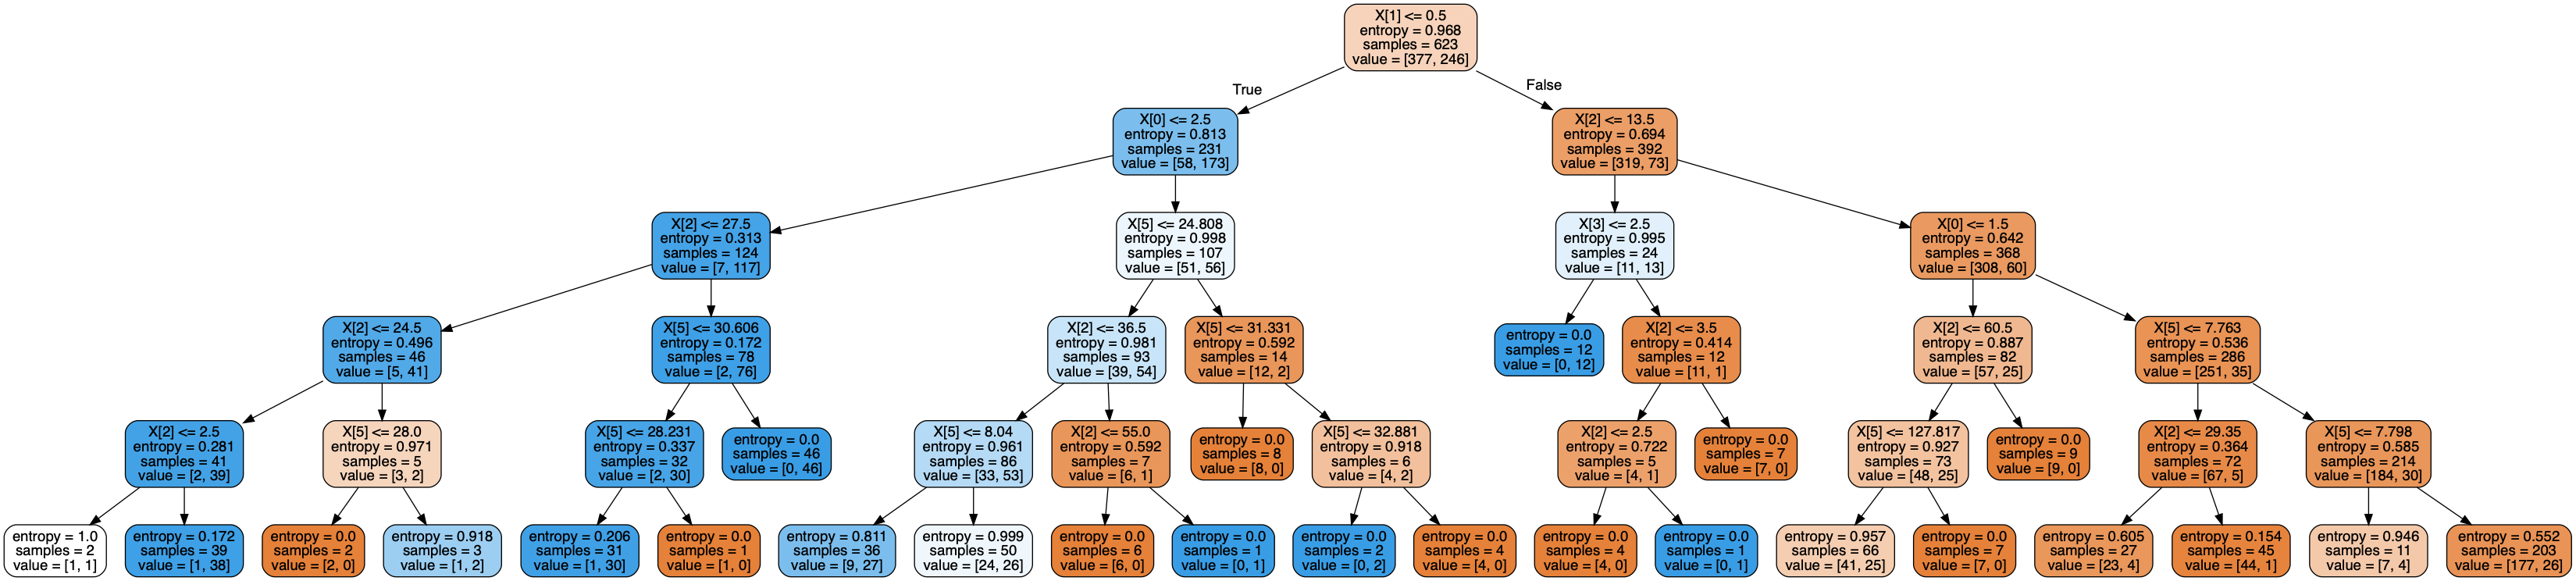

In [85]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# We can also use criteria as 'gini' which gives us a slight less accuracy.!